In [1]:
%matplotlib inline
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn import preprocessing
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from dataset_manager import *
from predict import *
from trame_show import *
from datetime import date, datetime
from termcolor import colored
import random


train_dataset, test_dataset = get_dataset()
shift_letter(train_dataset, test_dataset)
ctrl_alt_suppr(train_dataset, test_dataset)
d_list = list(test_dataset)

#train_dataset, test_dataset = filtre(train_dataset, test_dataset, 0.3)

X_train, Y_train = get_X_Y_vectorized_int(train_dataset)
X_test, Y_test = get_X_Y_vectorized_int(test_dataset)

X_train, Y_train = shuffle_X_Y(X_train, Y_train)
X_test, Y_test = shuffle_X_Y(X_test, Y_test)

#X_login_mdp, _ = get_pics_from_file(f"../tohack/pics_LOGINMDP.bin")
#X_login_mdp_filtred = filtre_result(X_login_mdp, np.array(train_dataset.get('NOKEY')).mean(0), 0.3)

#for l in range(0, len(X_login_mdp_filtred), 500):
#    trame_showw(X_login_mdp_filtred, "LOGINMDP", l)
#std_scale = preprocessing.StandardScaler().fit(X_train)
#X_train = std_scale.transform(X_train)
print(d_list)

['g', '3', 'v', 'z', '5', '0', 'm', 'p', 'y', 'i', 'CTRL', 'l', 'r', 'c', 'h', '4', 'j', 'SUPPR', 'w', 's', '7', 'k', '8', 'SHIFT', 'a', '1', 'b', 'q', 'SPACE', 'x', 'o', '9', 'NOKEY', 'd', '2', 'u', 'ENTER', 'n', 't', 'f', '6', 'e', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'ALT', 'CTRL+ALT', 'CTRL+ALT+SUPPR']


In [2]:
def train_model(epochs, batch_size, couches_neu):
    """Réseau de neurones"""
    delta_time = datetime.now().time()
    model = Sequential()
    model.add(Dense(17))
    for _ in range(couches_neu):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(len(d_list)))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    model.fit(np.array(X_train), np.array(Y_train), epochs=epochs, batch_size=batch_size, )
    
    test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test), verbose=0)

    accuracy = compute_accuracy_keras(model, d_list, X_test, Y_test)
    real_accu = sum(accuracy.values()) / len(d_list)
    
    #delta_time = datetime.combine(date.min, datetime.now().time()) - datetime.combine(date.min, delta_time)
    #plt.scatter([couches_neu], [real_accu], label='sortie_nbr={0}, time={1}s, 1st accu={2}'.format(couches_neu, round(delta_time.seconds, 3), round(test_acc, 3)))
    #print('sortie_nbr={0}, real_accu={1}, 1st accu={2}   {3}'.format(couches_neu, round(real_accu, 3), round(test_acc, 3), test_loss))
    return model

In [3]:
model = train_model(10, 60, 6)

Epoch 1/10
10838/10838 [==============================] - 24s 2ms/step - loss: 0.0142 - accuracy: 0.0914
Epoch 2/10
10838/10838 [==============================] - 23s 2ms/step - loss: 0.0091 - accuracy: 0.4415
Epoch 3/10
10838/10838 [==============================] - 24s 2ms/step - loss: 0.0079 - accuracy: 0.5110
Epoch 4/10
10838/10838 [==============================] - 25s 2ms/step - loss: 0.0076 - accuracy: 0.5322
Epoch 5/10
10838/10838 [==============================] - 24s 2ms/step - loss: 0.0074 - accuracy: 0.5420
Epoch 6/10
10838/10838 [==============================] - 26s 2ms/step - loss: 0.0073 - accuracy: 0.5474
Epoch 7/10
10838/10838 [==============================] - 26s 2ms/step - loss: 0.0072 - accuracy: 0.5540
Epoch 8/10
10838/10838 [==============================] - 26s 2ms/step - loss: 0.0072 - accuracy: 0.5548
Epoch 9/10
10838/10838 [==============================] - 26s 2ms/step - loss: 0.0072 - accuracy: 0.5579
Epoch 10/10
10838/10838 [==============================

In [4]:
accuracy = compute_accuracy_keras(model, d_list, X_test, Y_test)
for key, acc in accuracy.items():
    print(key, acc)
    
print("accuracy: ", sum(accuracy.values()) / len(d_list))

g 0.07911576497963932
3 0.0
v 0.8366515837104073
z 0.3358644859813084
5 0.23707440100882723
0 0.7462962962962963
m 0.21859785783836416
p 0.8433931484502447
y 0.0
i 0.8486454652532391
CTRL 0.9751720747295969
l 0.8964813870474247
r 0.4099526066350711
c 0.8091216216216216
h 0.282064128256513
4 0.6118204283360791
j 0.8018973214285714
SUPPR 0.5190380761523046
w 0.4044027721157766
s 0.8560140474100087
7 0.6694000863185153
k 0.790195044807591
8 0.0
SHIFT 0.9501557632398754
a 0.6811684275947794
1 0.0
b 0.3648566198901769
q 0.07614213197969544
SPACE 0.003305785123966942
x 0.5751989945538333
o 0.8468965517241379
9 0.6549364613880743
NOKEY 0.975150713130422
d 0.5644637053087758
2 0.6576500422654269
u 0.4792102901585402
ENTER 0.8893387314439946
n 0.8426640926640927
t 0.8954081632653061
f 0.5683785343335257
6 0.3649717514124294
e 0.4190031152647975
A 0.612668743509865
B 0.3925233644859813
C 0.7476635514018691
D 0.2949117341640706
E 0.6303219106957425
F 0.7777777777777778
G 0.48494288681204567
H 0.5

In [5]:
res = get_prediction_list_keras(model, d_list)
print(res)
get_creds(res)

['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'z', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'CTRL', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 't', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 

['NOKEY', 'CTRL', 't', 'p', 'CTRL+ALT+SUPPR', 'CTRL+ALT', 'ENTER', 'o', 'ALT', 'l', 'SHIFT', 'v', 'K', 'n', 's', 'N', 'L', 'O', 'i', 'j', 'c']


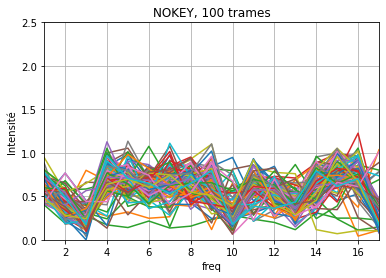

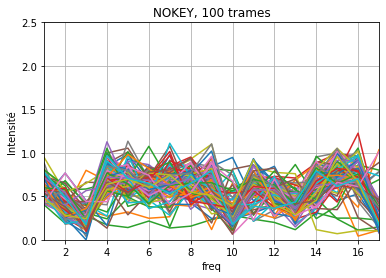

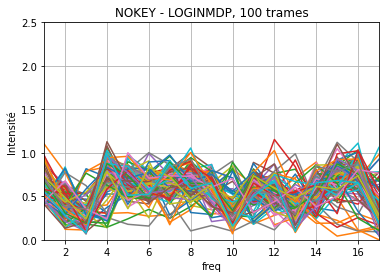

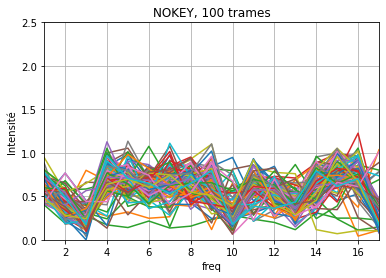

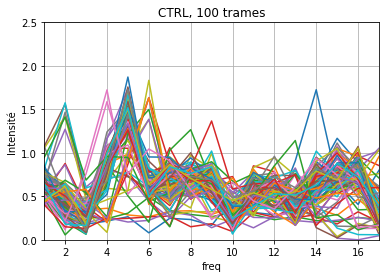

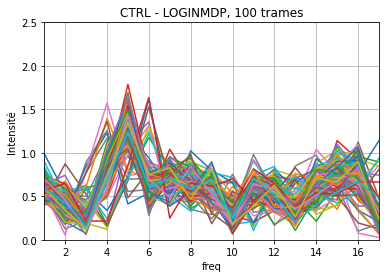

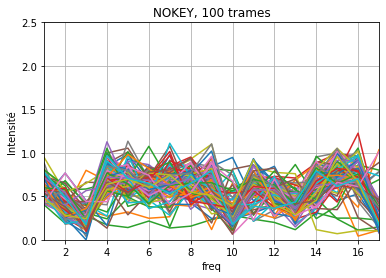

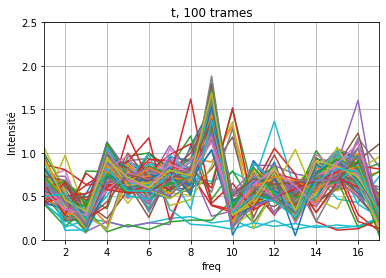

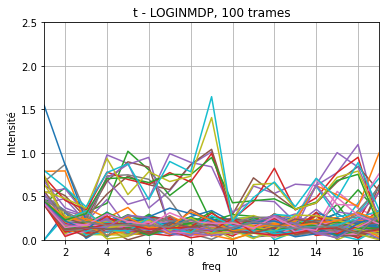

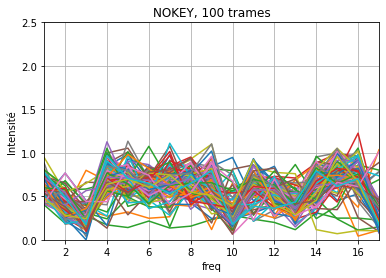

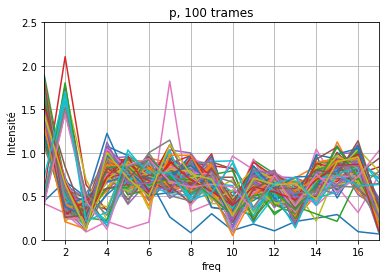

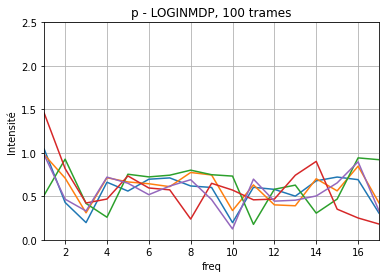

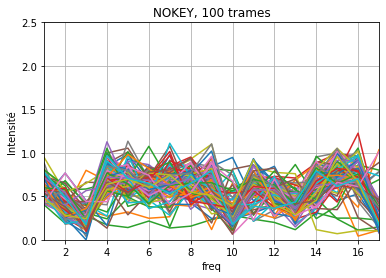

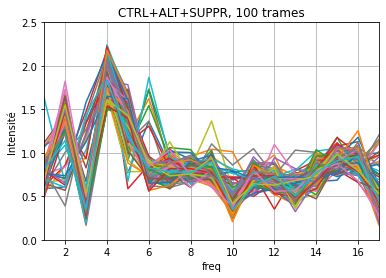

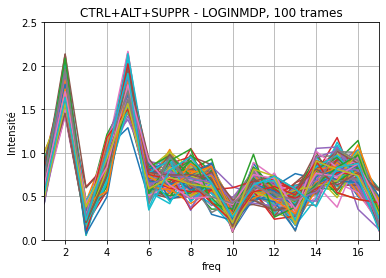

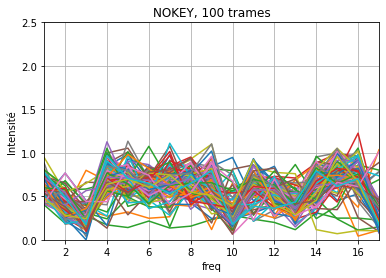

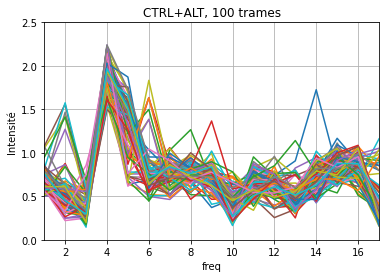

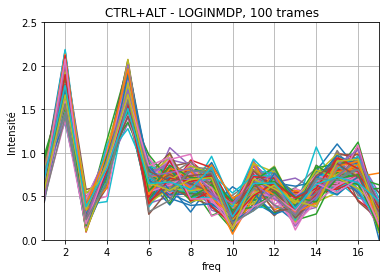

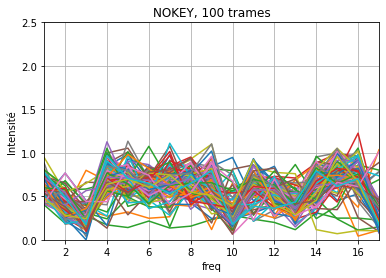

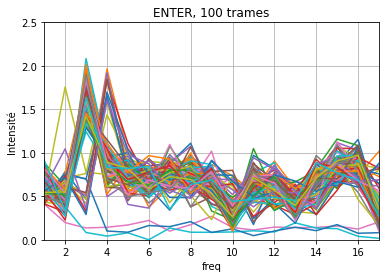

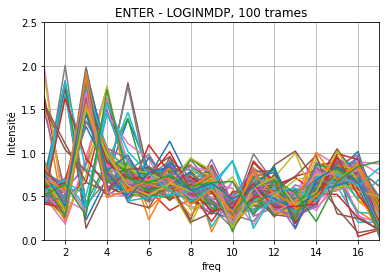

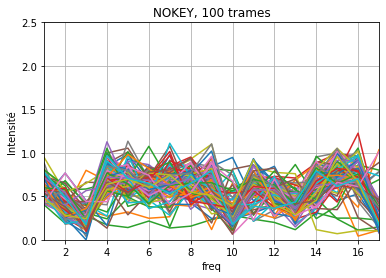

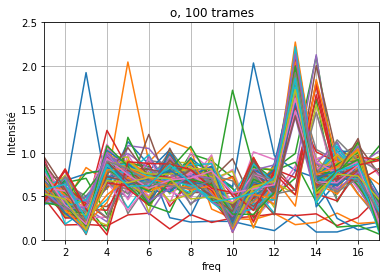

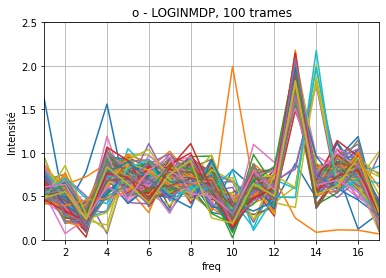

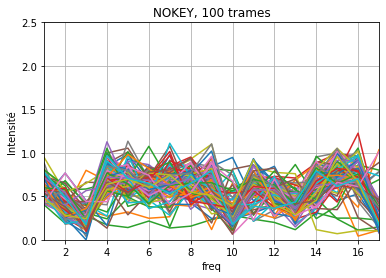

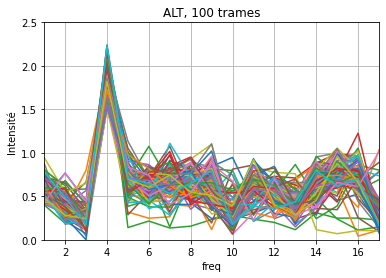

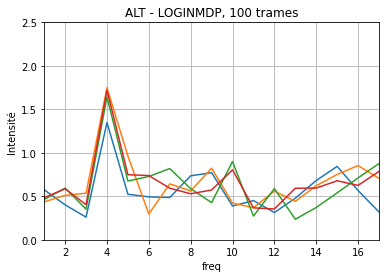

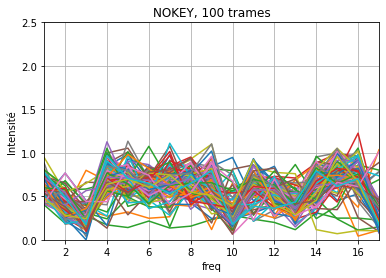

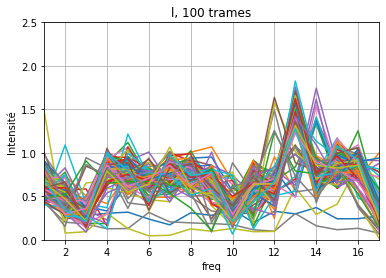

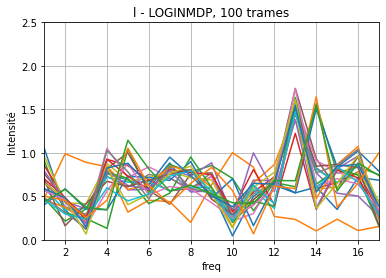

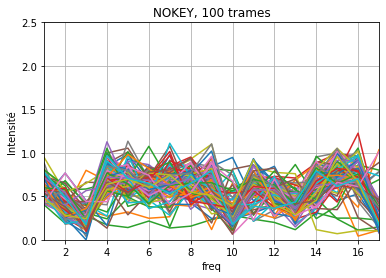

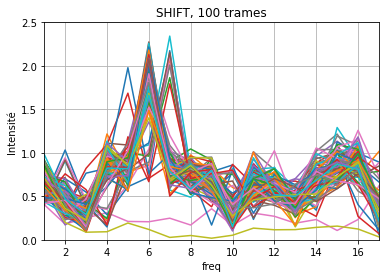

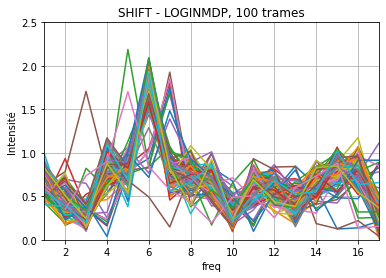

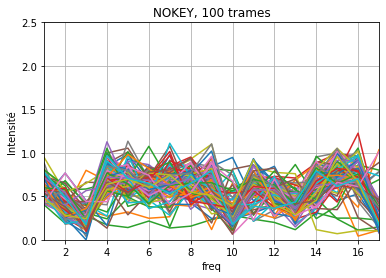

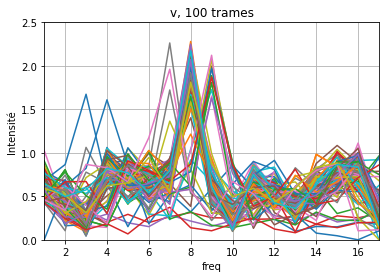

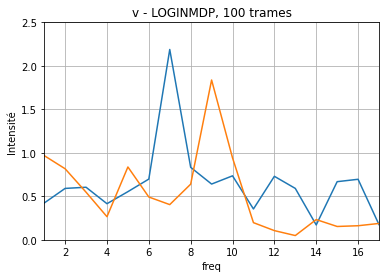

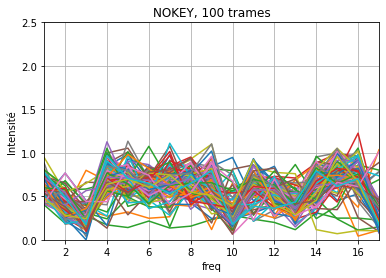

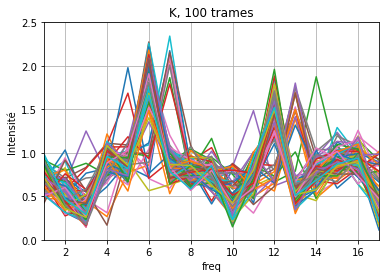

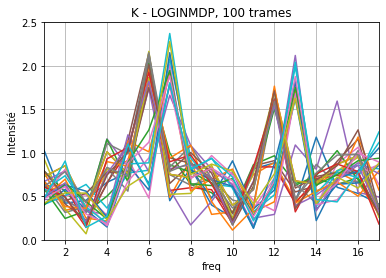

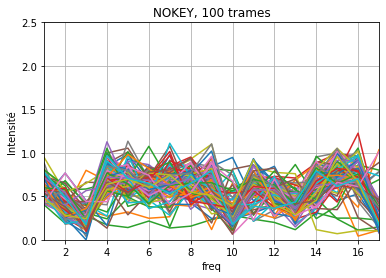

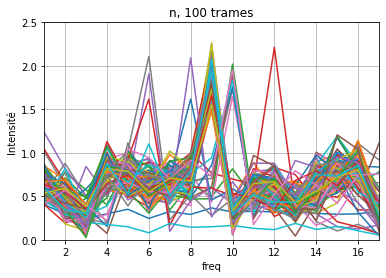

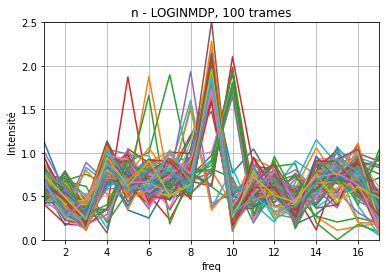

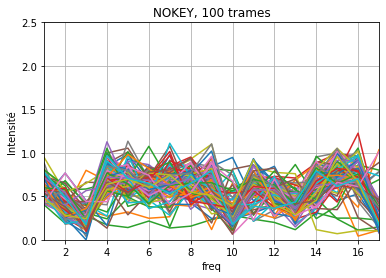

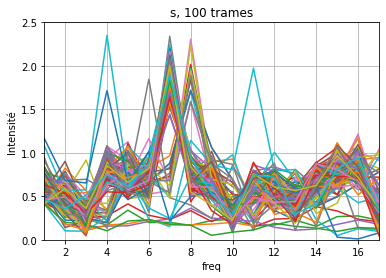

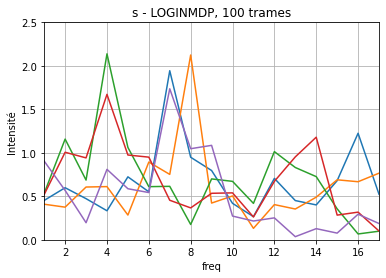

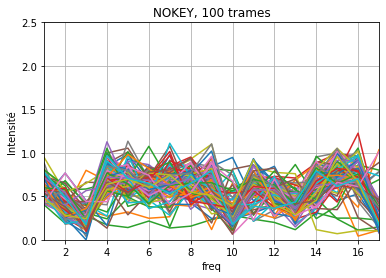

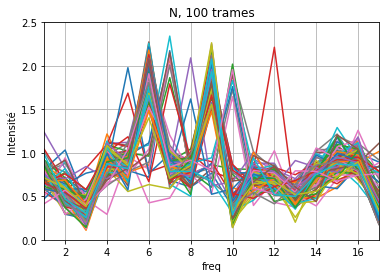

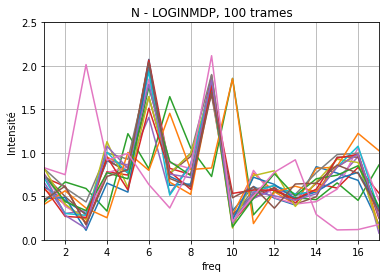

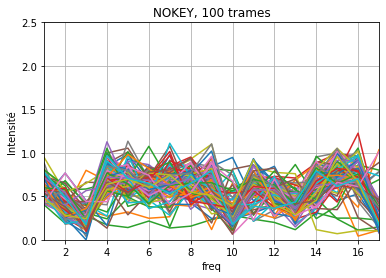

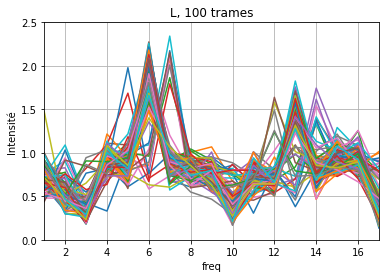

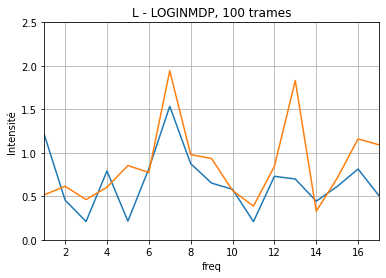

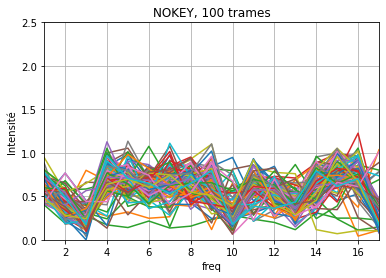

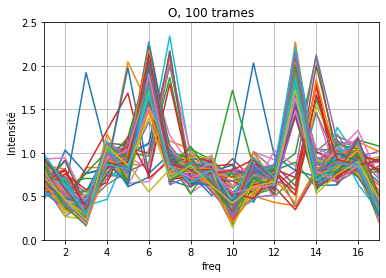

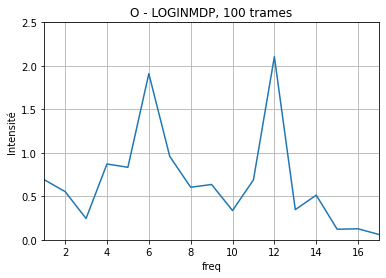

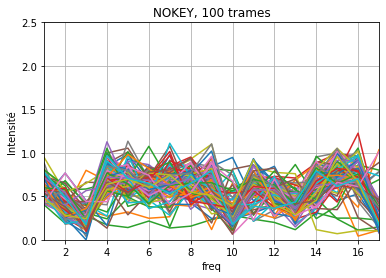

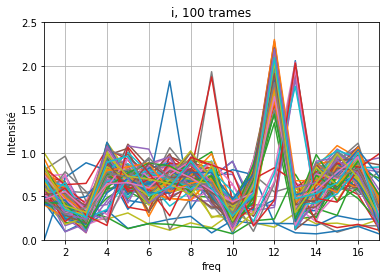

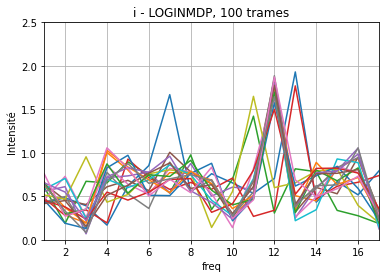

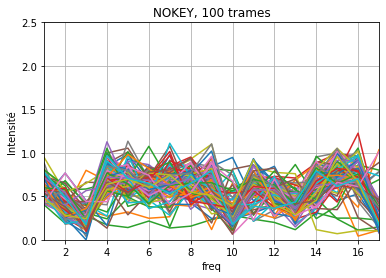

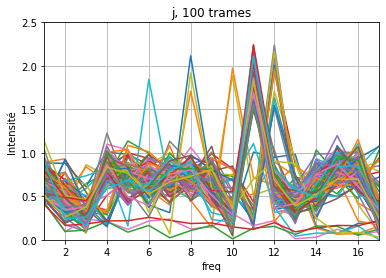

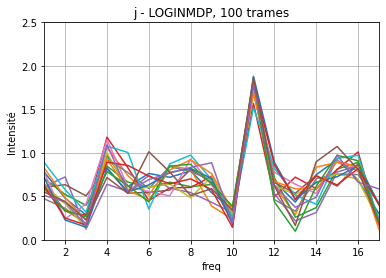

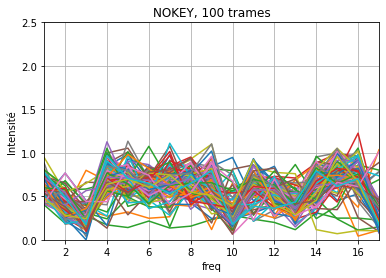

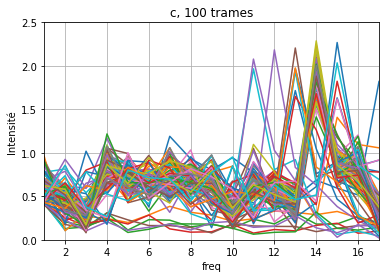

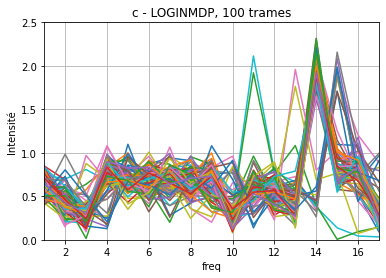

In [6]:
trame_show_result(train_dataset, accuracy, res, 0.8)

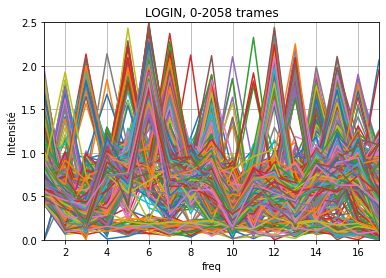

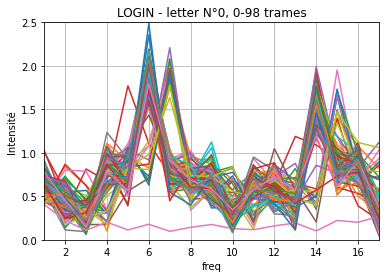

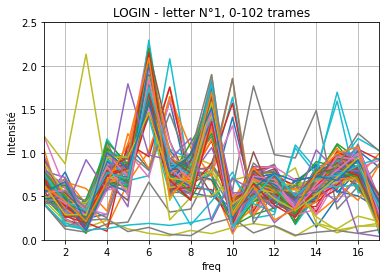

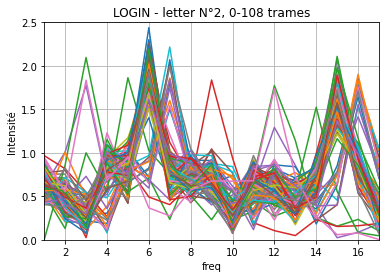

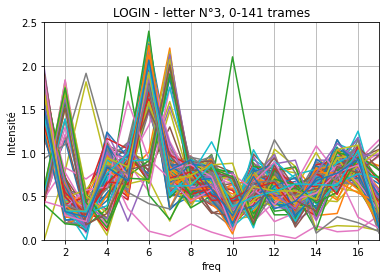

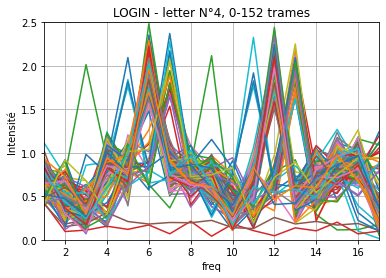

In [7]:
def find_start_sequence_index(arr, sub):
    start_seq, i_seq = None, 0
    for i_arr, e_arr in enumerate(arr):
        if not start_seq and sub[0] == e_arr:
            start_seq, i_seq = i_arr, 1
        elif start_seq and len(sub) <= i_seq:
            return start_seq
        elif start_seq and sub[i_seq] != e_arr:
            start_seq, i_seq = None, 0
        elif i_seq:
            i_seq += 1
    return start_seq

def trame_showw(X, key, figure_nbr):
    plt.figure()
    for i in X:
        plt.plot(range(1, len(i) + 1), i)
    
    plt.xlim(1, 17)
    plt.ylim(0, 2.5)
    plt.xlabel("freq")
    plt.ylabel("Intensité")
    plt.title("{0}, {1}-{2} trames".format(key, 0, figure_nbr))
    plt.grid()
    plt.show()

ctrl_alt_del_seq = (1481, 2147)
login_seq = (3011, 5069)
X_login_mdp, _ = get_pics_from_file("../tohack/pics_LOGINMDP.bin")
 
trame_showw(X_login_mdp[login_seq[0]:login_seq[1]], "LOGIN", login_seq[1] - login_seq[0])

letters = [
        (0, [
            'C', 'E', 'C', 'E', 'E', 'E', 'D', 'D', 'D', 'E', 'D', 'D', 'E', 'L', 'D', 'D', 'C', 'D', 'E', 'D', 'E', 'E', 'E', 'C', 'E', 'E', 'D', 'E', 'D', 'E', 'D', 'C', 'C', 'C', 'E', 'D', 'E', 'C', 'E', 'E', 'C', 'E', 'D', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'E', 'D', 'E', 'C', 'D', 'E', 'C', 'D', 'E', 'E', 'D', 'C', 'D', 'D', 'E', 'C', 'E', 'E', 'E', 'Q', 'E', 'D', 'K', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'NOKEY', 'E', 'E', 'C', 'E', 'E', 'D', 'SHIFT', 'SHIFT', 'C', 'E', 'E',
        ], 3224),
        (1, [
            'G', 'N', 'G', 'G', 'c', 'NOKEY', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'E', 'N', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'N', 'G', 'G', 'N', 'N', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'L', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'NOKEY', 'v', 'c', 'N', 'G', 'G', 'G', 'SHIFT', 'N', 'G', 'N', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'T', 'N', 'G'
        ], 3666),
        (2, [
            'Q', 'Q', 'W', 'W', 'A', 'A', 'Q', 'W', 'A', 'A', 'A', 'Q', 'W', 'Q', 'd', 'W', 'W', 'Q', 'Q', 'Q', 'A', 'W', 'W', 'Q', 'W', 'A', 'Q', 'Q', 'Q', 'Q', 'E', 'Q', 'A', 'W', 'A', 'W', 'W', 'W', 'A', 'W', 'SHIFT', 'Q', 'c', 'v', 'Q', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'A', 'Q', 'A', 'A', 'SHIFT', 'Q', 'A', 'Q', 'A', 'A', 'Q', 'W', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'A', 'W', 'A', 'SHIFT', 'W', 'A', 'A', 'Q', 'Q', 'A', 'Q', 'W', 'A', 'W', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'W', 'A', 'SHIFT', 'A', 'W', 'SHIFT', 'A', 'Q', 'Q', 'A', 'SHIFT', 'W', 'A', 'Q', 'd', 'A', 
        ], 4034),    
        (3, [
            'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'w', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'R', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'm', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'SHIFT', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', '4', 'P', 'P', 'M', 'P', 'P', 'n', 'P', 'P', 'P', 'P', 'M', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'P', 'R', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'M', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'M', 'SHIFT', 'P', 
        ], 4423),
        (4, [
            'I', '4', 'NOKEY', 'I', 'K', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'J', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'NOKEY', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'NOKEY', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'SHIFT', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'U',
        ], 4824),
]


for i, seq , start_tmp in letters:
    start = find_start_sequence_index(res, seq) or start_tmp 
    trame_showw(X_login_mdp[start: start + len(seq)], f"LOGIN - letter N°{i}", len(seq))